In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [3]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.shape

(167, 10)

In [5]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
# check for null vallues
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Observations
- No Null values
- data types are all numeric as required.

## Data preprocessing 
- since few columns are given as percentage of GDPP. we convert them to absolute values


In [8]:
# exports
data['exports_abs'] = (data['exports']/100)*data['gdpp']

In [9]:
# health spending
data['health_abs'] = (data['health']/100)*data['gdpp']

In [10]:
# imports
data['imports_abs'] = (data['imports']/100)*data['gdpp']

In [11]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_abs,health_abs,imports_abs
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


In [12]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_abs,health_abs,imports_abs
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,7420.618847,1056.733204,6588.352108
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,17973.885795,1801.408906,14710.810418
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,1.076920,12.821200,0.651092
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,447.140000,78.535500,640.215000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1777.440000,321.886000,2045.580000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7278.000000,976.940000,7719.600000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,183750.000000,8663.600000,149100.000000


## Univariate analysis

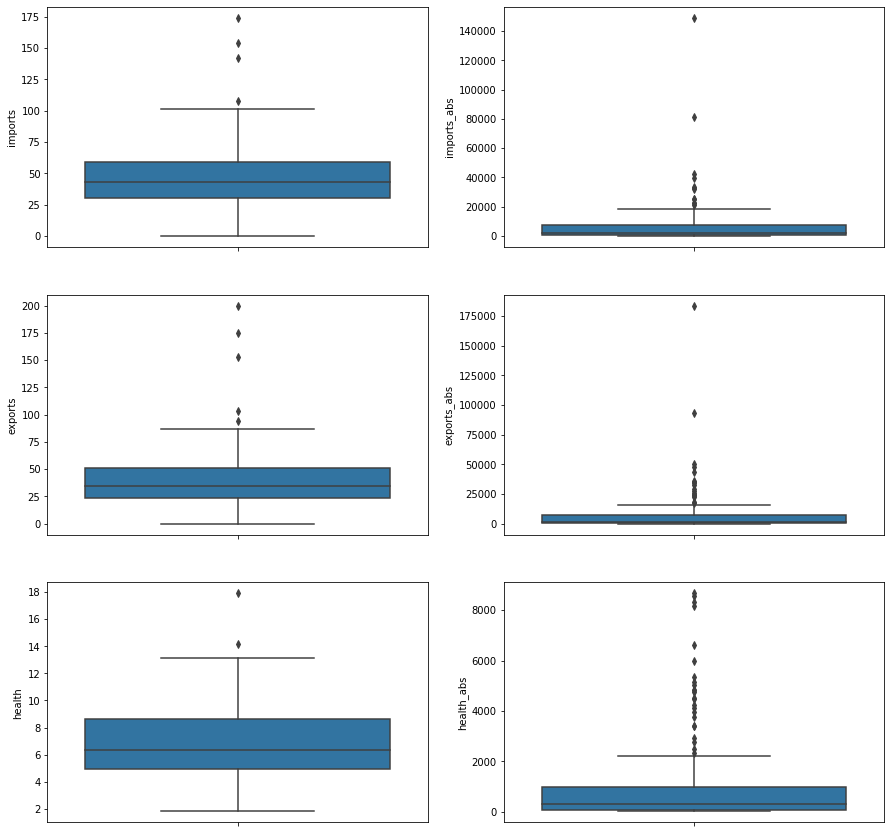

In [17]:
plt.figure(figsize = (15, 15))
plt.subplot(3, 2, 1)
sns.boxplot(data.imports, orient='v')

plt.subplot(3, 2, 2)
sns.boxplot(data.imports_abs, orient='v')

plt.subplot(3, 2, 3)
sns.boxplot(data.exports, orient='v')

plt.subplot(3, 2, 4)
sns.boxplot(data.exports_abs, orient='v')

plt.subplot(3, 2, 5)
sns.boxplot(data.health, orient='v')

plt.subplot(3, 2, 6)
sns.boxplot(data.health_abs, orient='v')

### Observation
- Few countries seem to be spending high percentage of gdp on health. 
- Absolute value of export are limited in a range. however, there are few countries doing high %age of exports

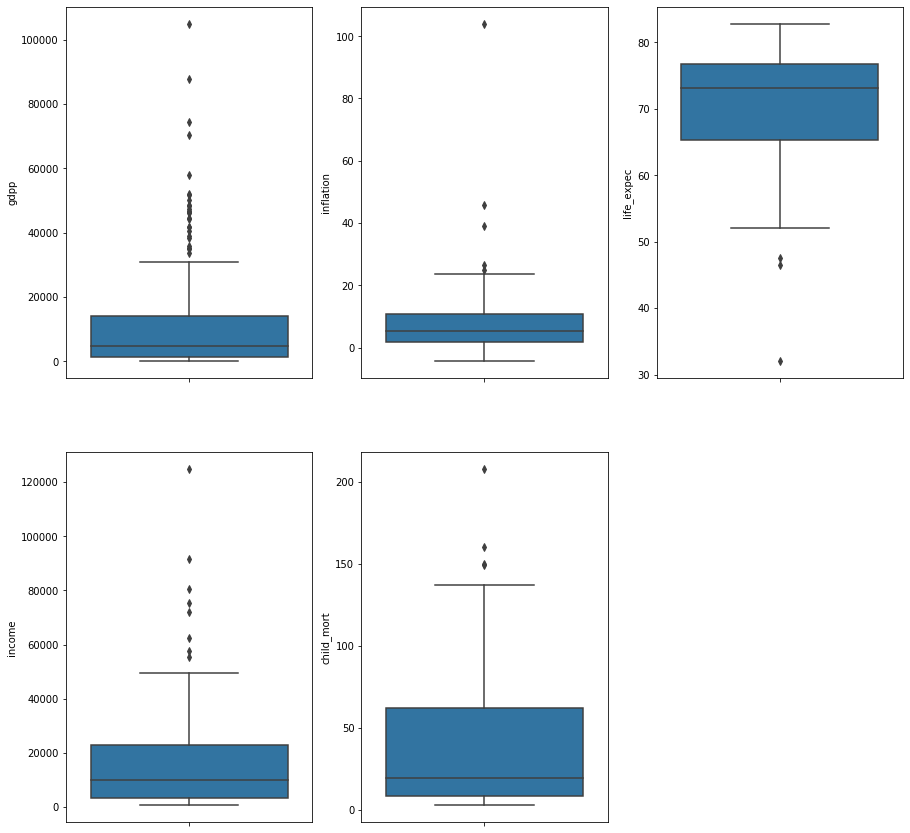

In [19]:
plt.figure(figsize = (15, 15))

plt.subplot(2, 3, 1)
sns.boxplot(data.gdpp, orient='v')

plt.subplot(2, 3, 2)
sns.boxplot(data.inflation, orient='v')

plt.subplot(2, 3, 3)
sns.boxplot(data.life_expec, orient='v')

plt.subplot(2, 3, 4)
sns.boxplot(data.income, orient='v')

plt.subplot(2, 3, 5)
sns.boxplot(data.child_mort, orient='v')

### Observation
- Above 8 graphs indicate there are outliers in almost all columns. 
- These may be related. 

Let's look at the correlation of the of all the columns

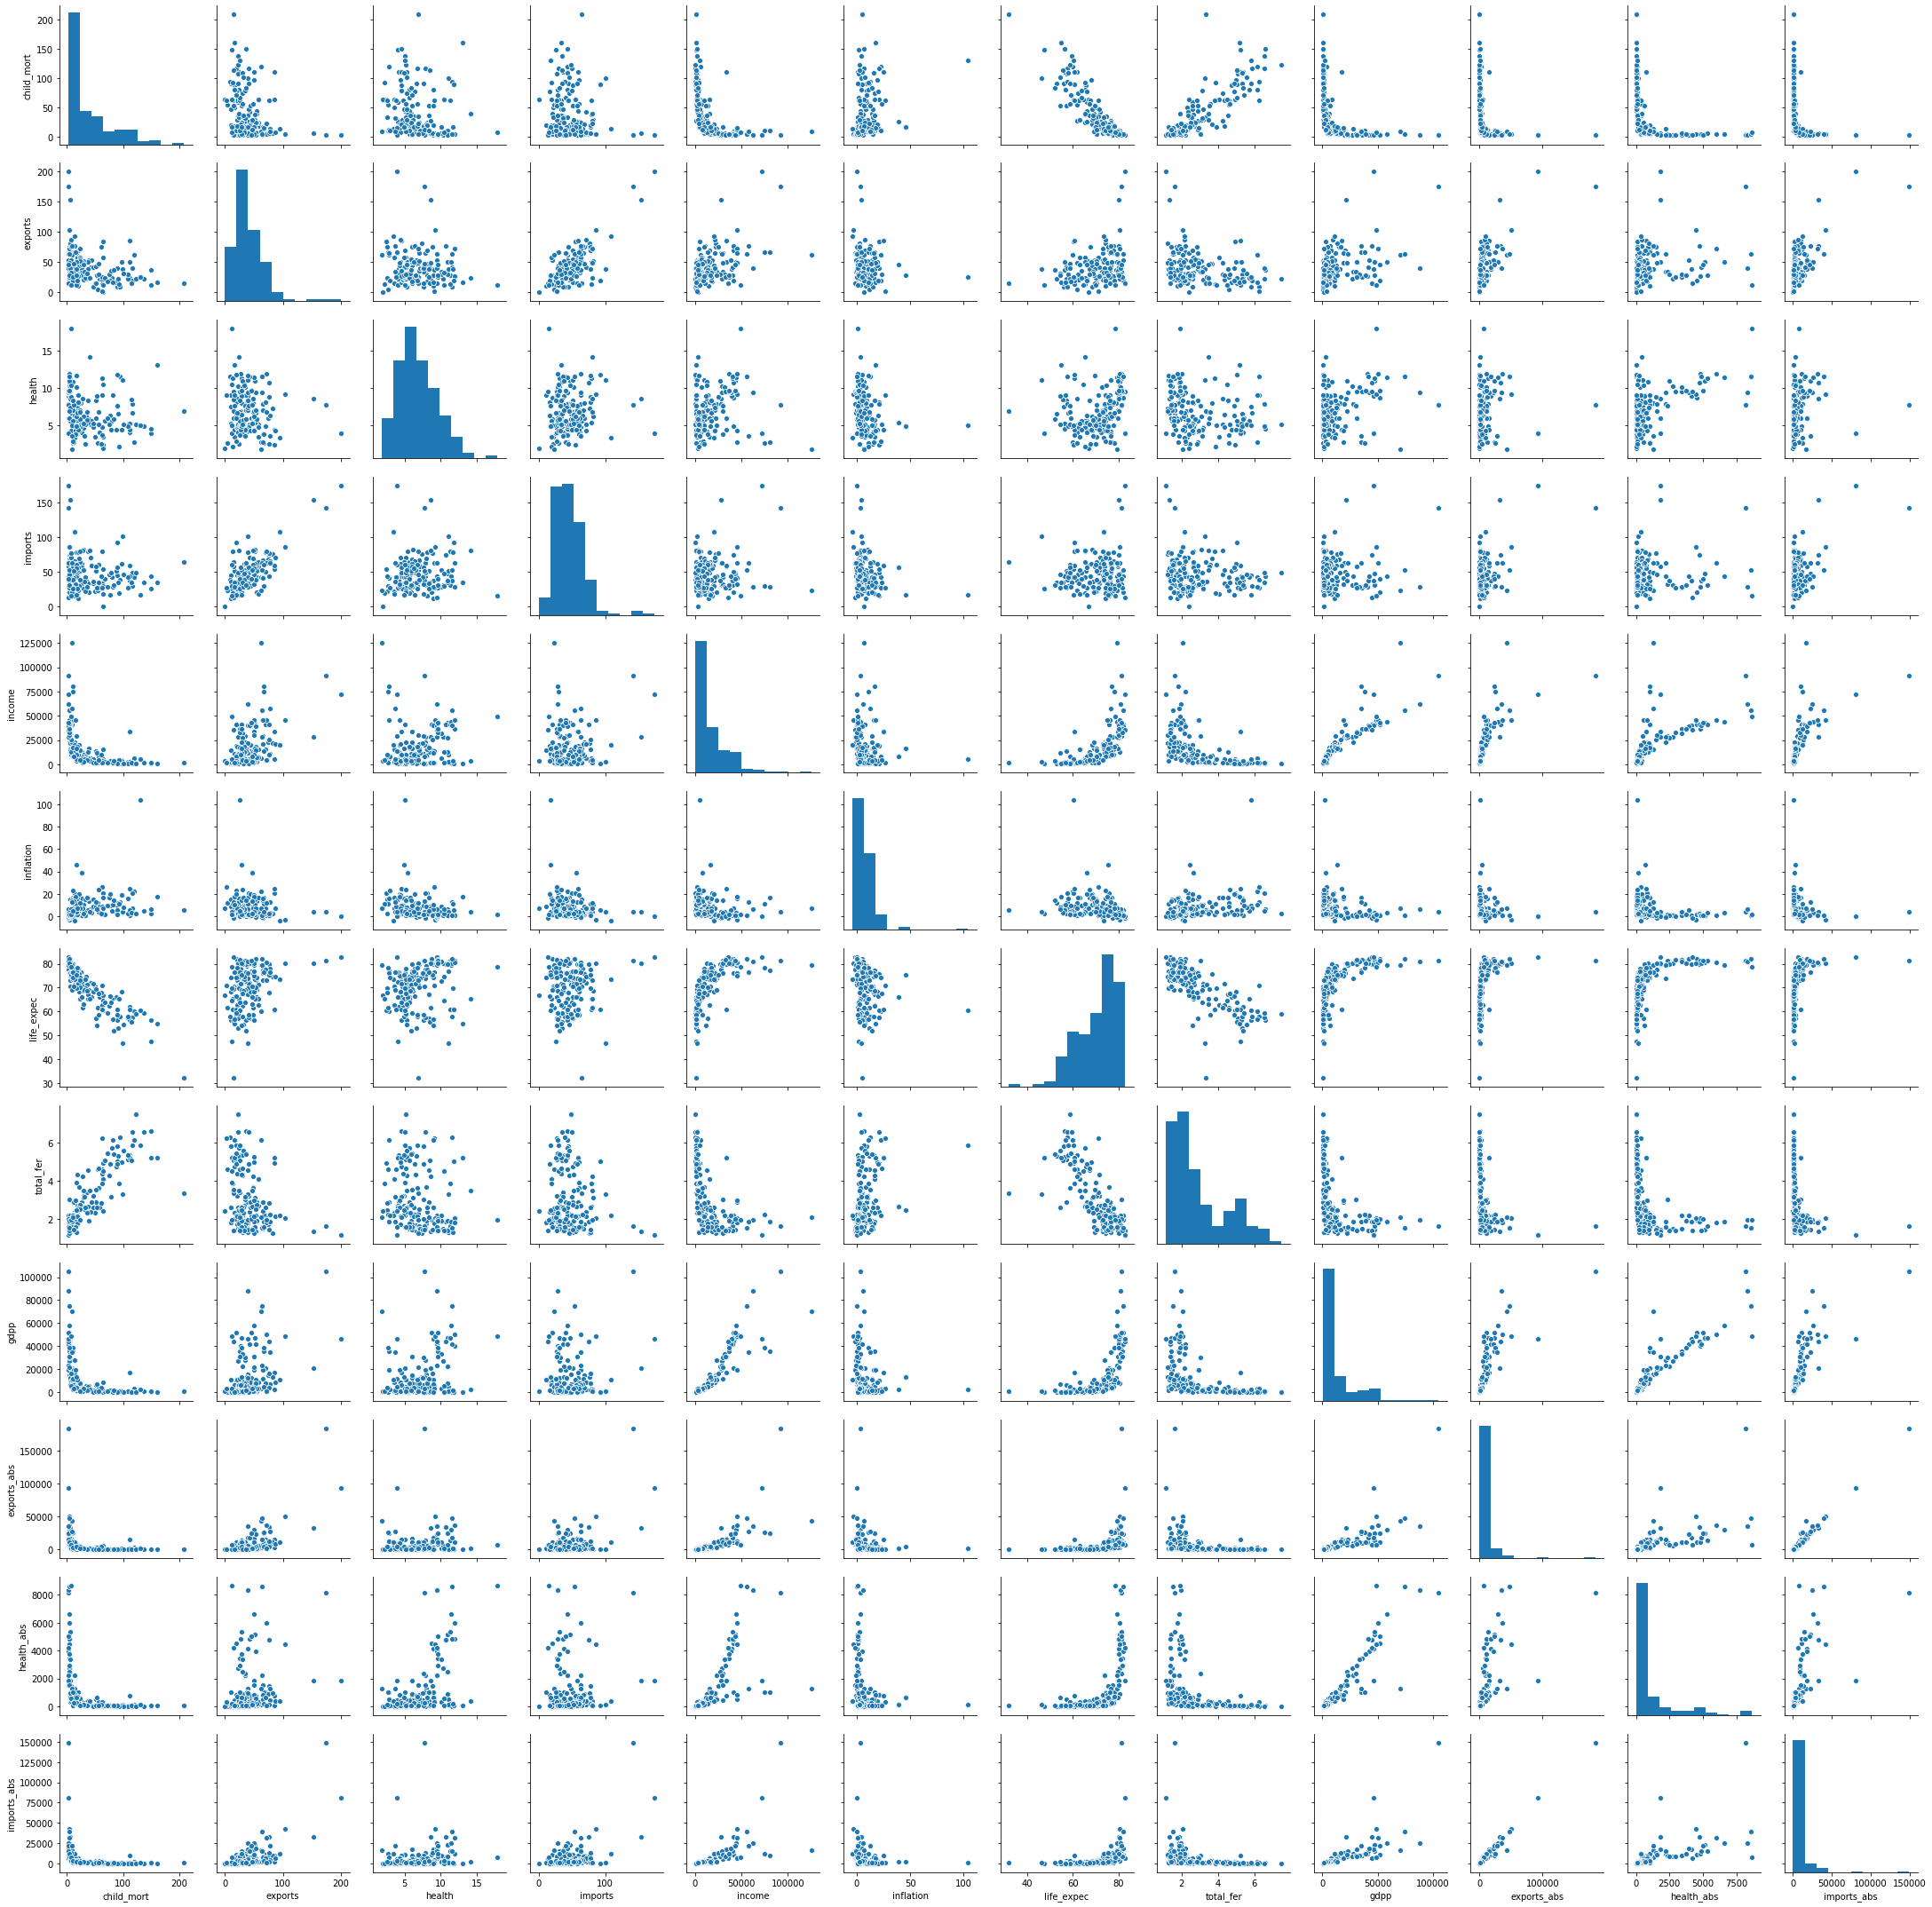

In [20]:
sns.pairplot(data=data)

### Observations 
- For countries with low gdp range of child mortality rate is broad. 
- but for countries with high gdp, the child mortality rate is mostly low. 
- imports and exports are range bound. we wil have to explore it further. Some countries with high gdp might be importing some specific things and exporting other things in similar amounts hence balancing the scale. 

- Income and gdpp have linear relationship. 
- total_fert and life_expec are highly correlated.

Let's dig deeper into following pairs
- gdp and health spendings
- gdp and imports
- import and export patterns
- child mortality rate and health spendings
- life expectancy and health spendings.
- inflation and gdpp

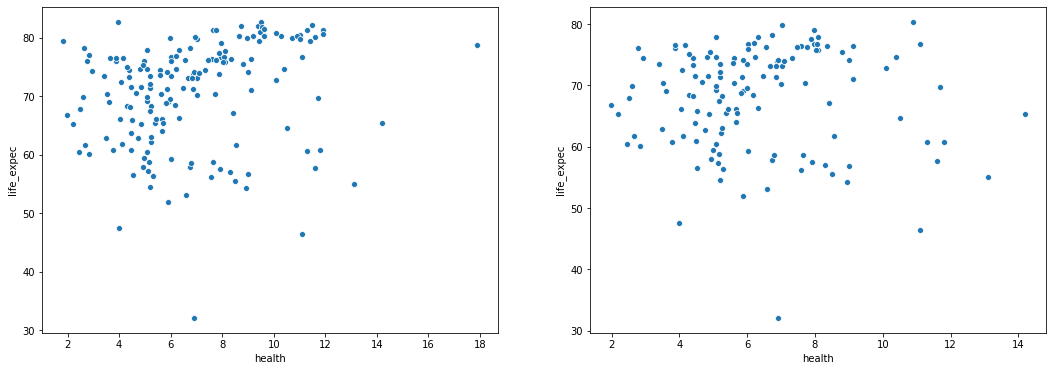

In [17]:
# life expectancy and health spendings.
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='health', y='life_expec')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data.loc[data['gdpp']<20000], x='health', y='life_expec')

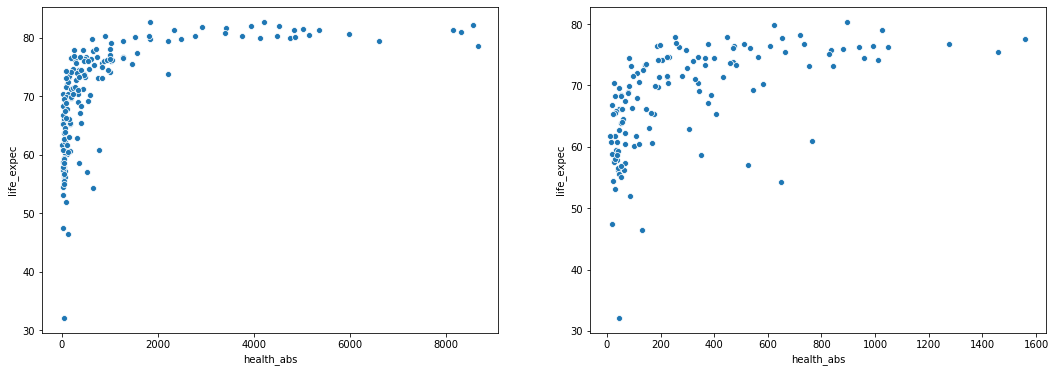

In [18]:
# life expectancy and health spendings.
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='health_abs', y='life_expec')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data.loc[data['gdpp']<20000], x='health_abs', y='life_expec')

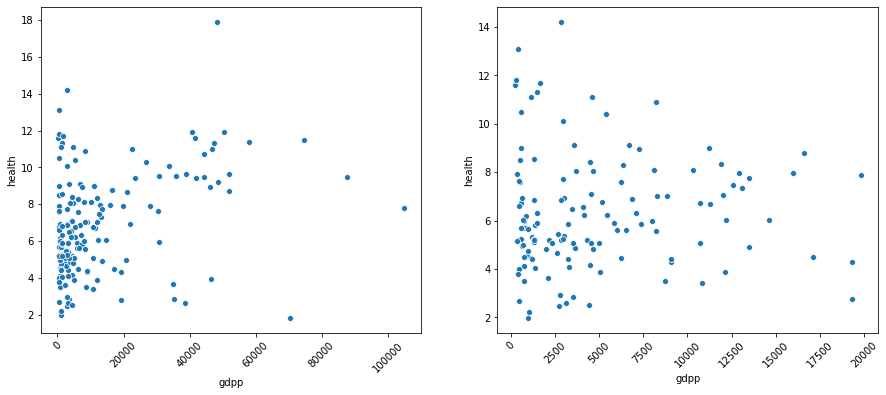

In [19]:
# gdpp and health spendings.
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.scatterplot(data=data, y='health', x='gdpp')

plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.scatterplot(data=data.loc[data['gdpp']<20000], y='health', x='gdpp')

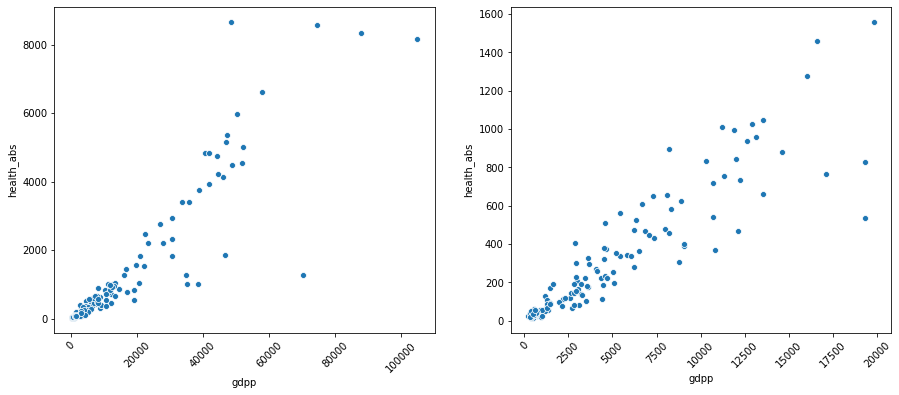

In [20]:
# gdpp and health spendings.
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.scatterplot(data=data, y='health_abs', x='gdpp')

plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.scatterplot(data=data.loc[data['gdpp']<20000], y='health_abs', x='gdpp')

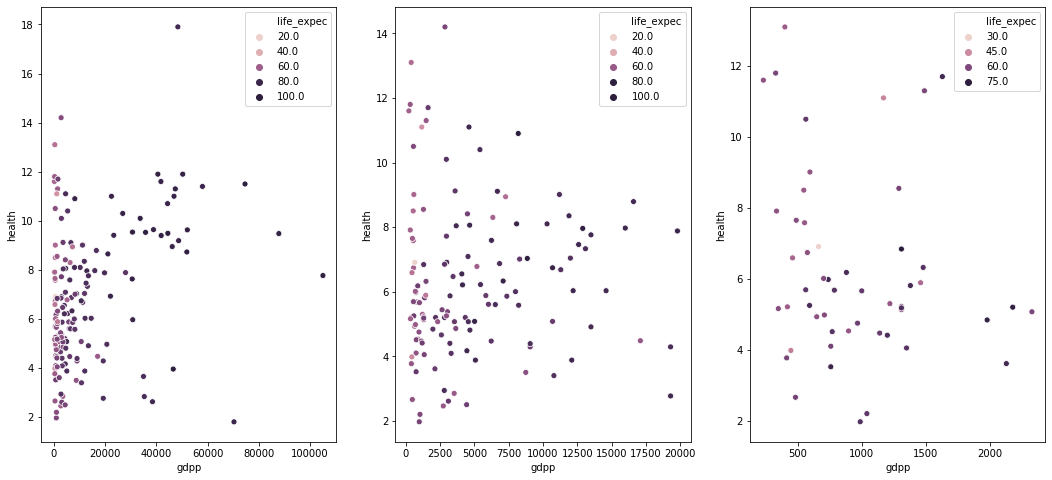

In [21]:
# gdp , health and life_expe
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='gdpp', y='health', hue='life_expec')


plt.subplot(1, 3, 2)
sns.scatterplot(data=data.loc[data['gdpp']<20000], x='gdpp', y='health', hue='life_expec')

# countries with low gpd
plt.subplot(1, 3, 3)
sns.scatterplot(data=data.loc[data['gdpp']<2500], x='gdpp', y='health', hue='life_expec')

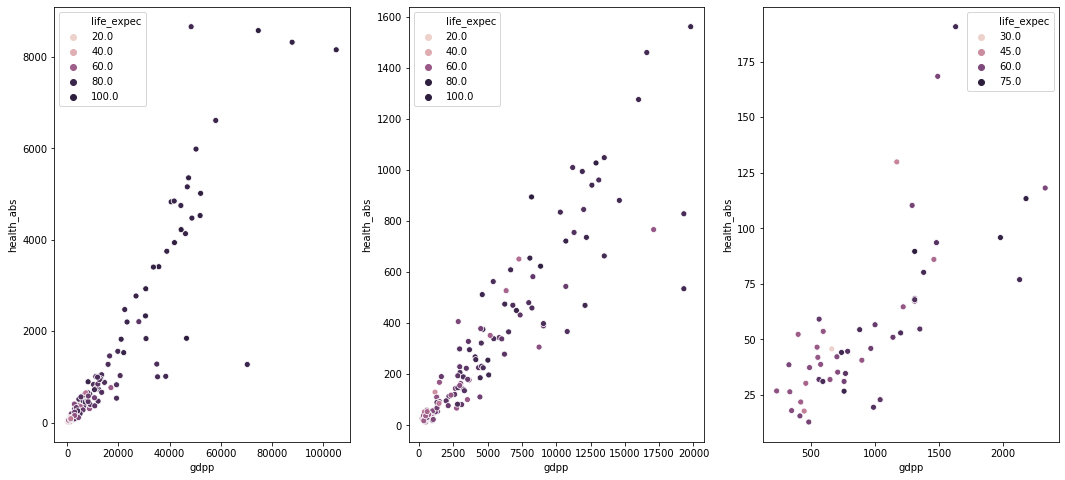

In [22]:
# gdp , health and life_expe
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='gdpp', y='health_abs', hue='life_expec')


plt.subplot(1, 3, 2)
sns.scatterplot(data=data.loc[data['gdpp']<20000], x='gdpp', y='health_abs', hue='life_expec')

# countries with low gpd
plt.subplot(1, 3, 3)
sns.scatterplot(data=data.loc[data['gdpp']<2500], x='gdpp', y='health_abs', hue='life_expec')

### Observation
- health spending gradually increases with GDP. 
- life expectancy is high in countries with high-gdp
- life expectancy is low in countries with less gdp even in cases where spending on health is high



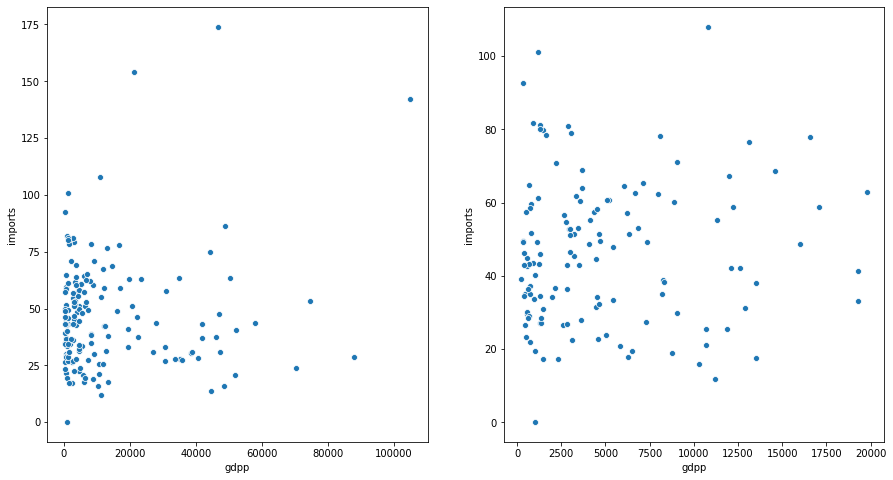

In [23]:
# gdpp and imports spendings.
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, y='imports', x='gdpp')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data.loc[data['gdpp']<20000], y='imports', x='gdpp')

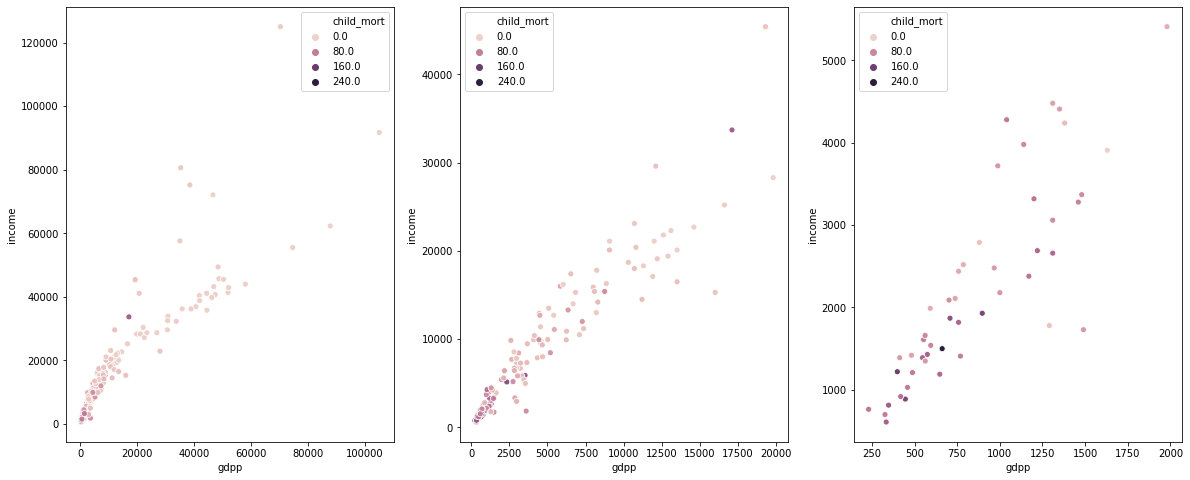

In [24]:
# gdp , income and child_mort
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='gdpp', y='income', hue='child_mort')

# countries with low gpd
plt.subplot(1, 3, 2)
sns.scatterplot(data=data.loc[data['gdpp']<20000], x='gdpp', y='income', hue='child_mort')

plt.subplot(1, 3, 3)
sns.scatterplot(data=data.loc[data['gdpp']<2000], x='gdpp', y='income', hue='child_mort')

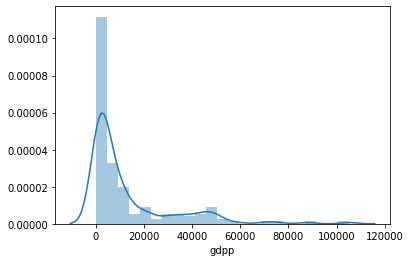

In [16]:
sns.distplot(data['gdpp'])

## Outlier handling

#### Observations for gdpp column.
- there are very few countries with gdp >60000 and even lesser for 80000

In [17]:
data.loc[data.gdpp>60000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600


### Observation
- above countries have all factors as good. 
    - high gdp,
    - low mortality rate,
    - high income per person
    - high life expectancy. 
    - Luxembourg clearly does exports over and above its gdp but so are its imports. it is a country rich through trade 
    
Since we are looking at countries for aid there can be 2 ways to handle this. 
1. drop these columns as these country do not need much aid. 
2. group them into one cluster and just not consider the cluster for aid. 

In [18]:
# lets leave these countries for now. 

newData = data.loc[data.gdpp<=60000]
newData.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [19]:
newData.shape

(163, 10)

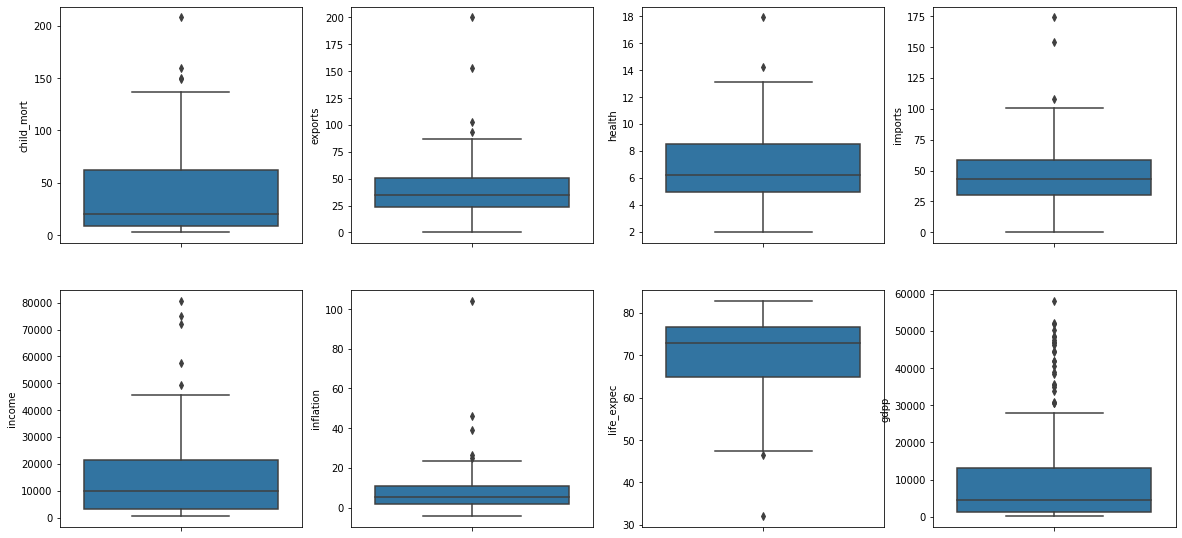

In [20]:
plt.figure(figsize = (20,20))
plt.subplot(4, 4, 1)
sns.boxplot(newData.child_mort, orient='v')

plt.subplot(4, 4, 2)
sns.boxplot(newData.exports, orient='v')

plt.subplot(4, 4, 3)
sns.boxplot(newData.health, orient='v')

plt.subplot(4, 4, 4)
sns.boxplot(newData.imports, orient='v')

plt.subplot(4, 4, 5)
sns.boxplot(newData.income, orient='v')

plt.subplot(4, 4, 6)
sns.boxplot(newData.inflation, orient='v')

plt.subplot(4, 4,7)
sns.boxplot(newData.life_expec, orient='v')

plt.subplot(4, 4,8)
sns.boxplot(newData.gdpp, orient='v')


In [21]:
# looking at high inflation
newData.loc[newData.inflation>60]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330


### Observation
Clearly Nigeria has low gdpp, high mortality rate and inflation, low life_expectactancy. We cannot drop this as it makes a good candidate for aid

In [22]:
# looking at lowest life expactancy
newData.loc[newData.life_expec<40]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662


### Observations
Hiati again has
- low GDP.
- Life expecatancy is very low. 
- income per person is low
- child mortality rate is high. 

this again makes a case for aid. we can not drop this as well. 


### Rescaling

In [23]:
rfm_df = newData[['gdpp', 'child_mort','income']]

scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['gdpp', 'child_mort','income']
rfm_df_scaled.head()

,gdpp,child_mort,income
0,-0.736757,1.266659,-0.881403
1,-0.492243,-0.557354,-0.353953
2,-0.466665,-0.292179,-0.165669
3,-0.530956,1.980404,-0.609437
4,0.068403,-0.713486,0.227382


## Hierarchical Clustering

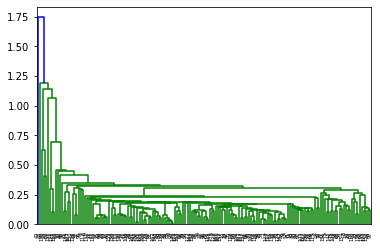

In [24]:
# single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

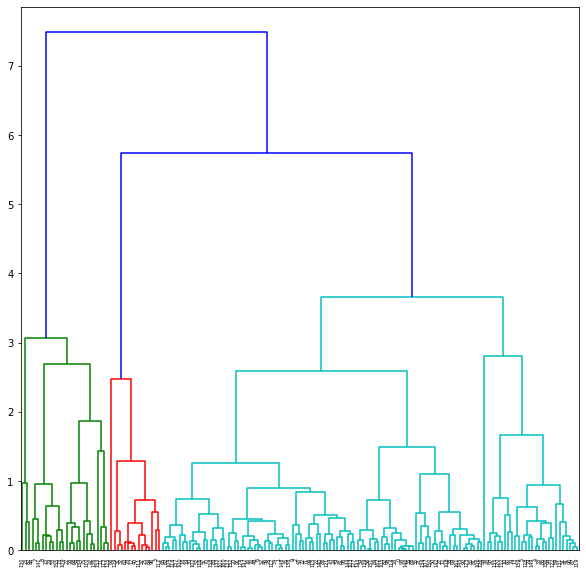

In [25]:
# complete linkage
plt.figure(figsize=(10,10))
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [26]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )

In [27]:
# assign cluster labels
newData['cluster_labels'] = cluster_labels
newData.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


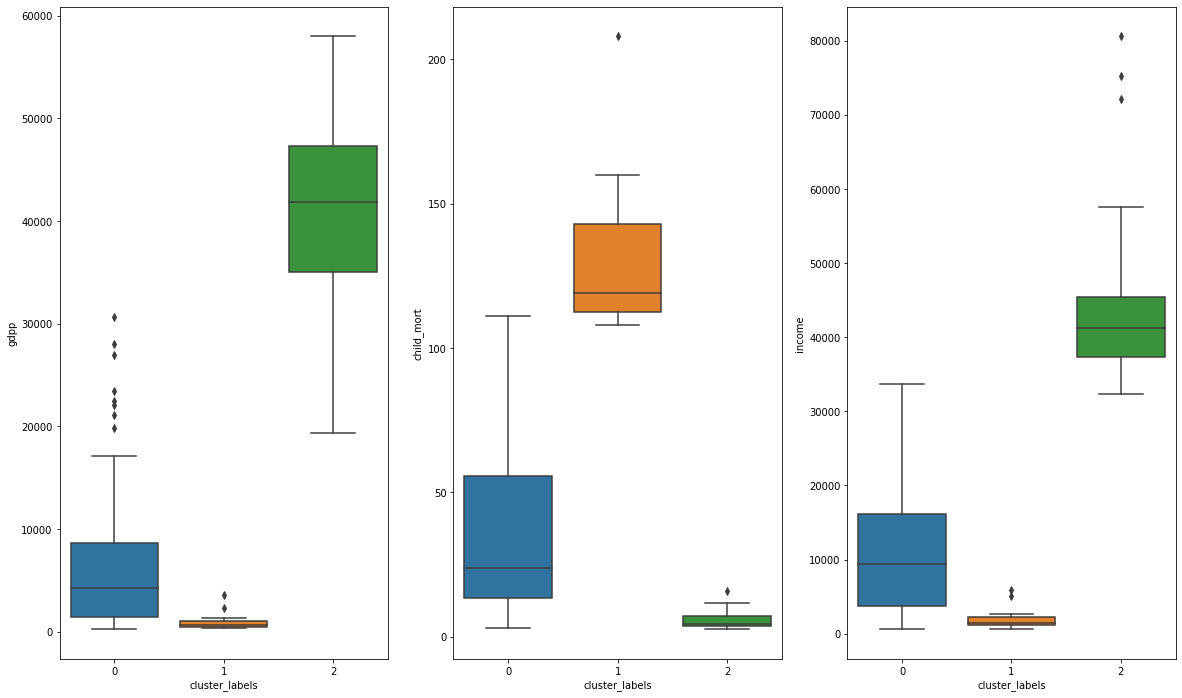

In [28]:
# plots
plt.figure(figsize=(20, 12))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels', y='gdpp', data=newData)

plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels', y='child_mort', data=newData)

plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels', y='income', data=newData)


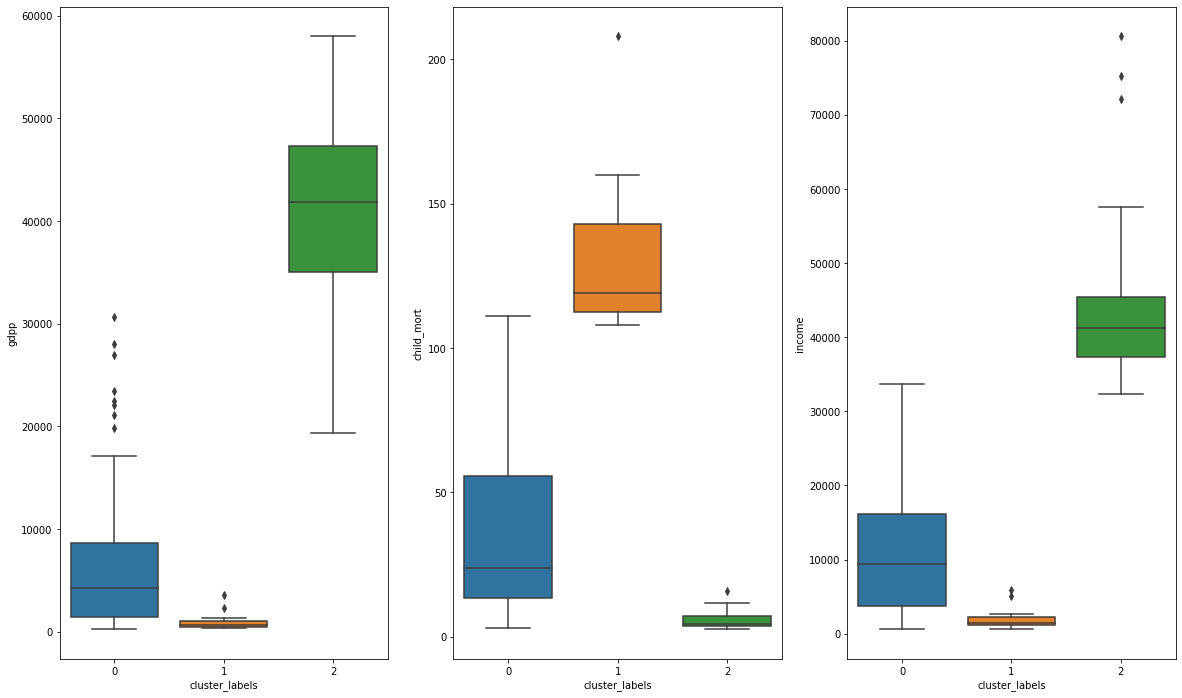

In [29]:
# plots
plt.figure(figsize=(20, 12))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels', y='gdpp', data=newData)

plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels', y='child_mort', data=newData)

plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels', y='income', data=newData)


In [30]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 2, 2, 0, 3, 3, 0, 2, 3, 0, 2, 0, 3, 0, 1, 0, 0, 0, 0,
       0, 3, 0, 1, 0, 0, 1, 3, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 3, 2,
       3, 0, 0, 0, 0, 2, 0, 2, 0, 3, 3, 0, 0, 0, 3, 0, 2, 0, 0, 1, 1, 0,
       1, 2, 3, 0, 0, 0, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 1, 1, 3, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 3, 0, 0, 2, 1, 3, 2,
       2, 0, 0, 2, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3,
       3, 3, 2, 0, 0, 2, 0, 0, 0])

In [31]:
fourClusterData = newData
fourClusterData['cluster_labels'] = cluster_labels

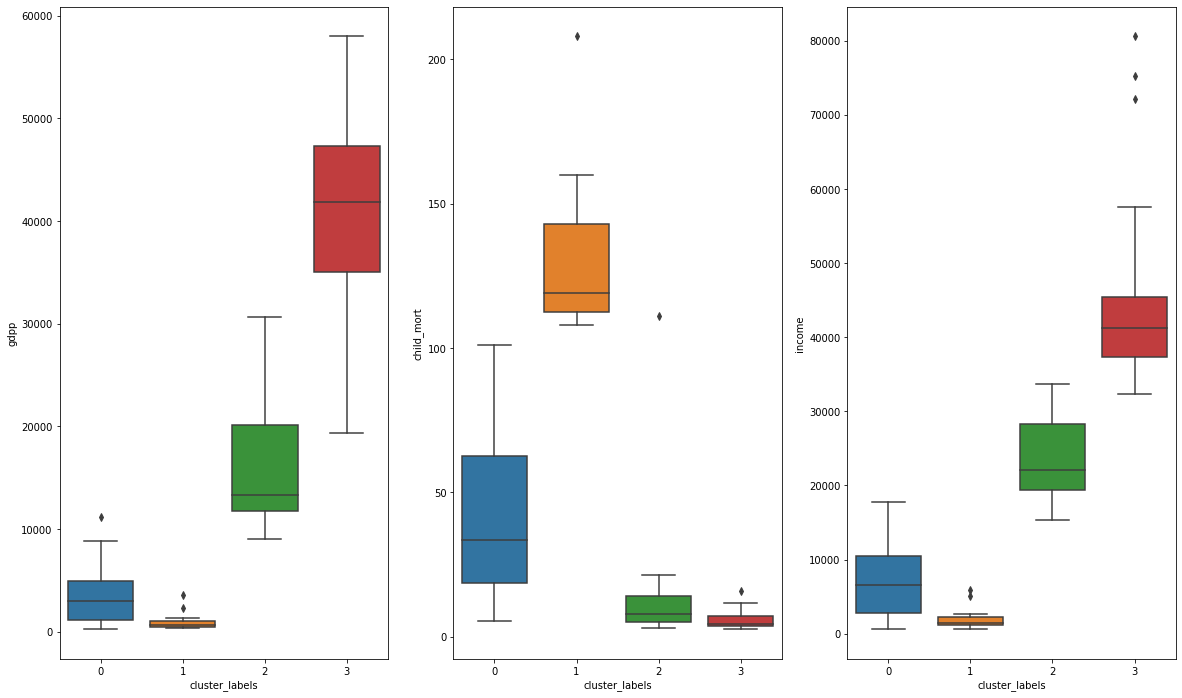

In [32]:
# plots
plt.figure(figsize=(20, 12))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels', y='gdpp', data=fourClusterData)

plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels', y='child_mort', data=fourClusterData)

plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels', y='income', data=fourClusterData)

In [33]:
rfm_df = newData.select_dtypes(include=['float64', 'int'])
rfm_df.drop(['cluster_labels'], inplace= True, axis=1)
rfm_df

,child_mort,exports,health,imports,inflation,life_expec,total_fer
0,90.2,10.0,7.58,44.9,9.44,56.2,5.82
1,16.6,28.0,6.55,48.6,4.49,76.3,1.65
2,27.3,38.4,4.17,31.4,16.10,76.5,2.89
3,119.0,62.3,2.85,42.9,22.40,60.1,6.16
4,10.3,45.5,6.03,58.9,1.44,76.8,2.13
...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2.62,63.0,3.50
163,17.1,28.5,4.91,17.6,45.90,75.4,2.47
164,23.3,72.0,6.84,80.2,12.10,73.1,1.95
165,56.3,30.0,5.18,34.4,23.60,67.5,4.67


In [34]:
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = rfm_df.columns
rfm_df_scaled.head()

,child_mort,exports,health,imports,inflation,life_expec,total_fer
0,1.266659,-1.179421,0.289459,-0.070077,0.147551,-1.598714,1.875433
1,-0.557354,-0.472376,-0.090563,0.089790,-0.317456,0.680403,-0.874719
2,-0.292179,-0.063860,-0.968673,-0.653372,0.773197,0.703081,-0.056928
3,1.980404,0.874939,-1.455692,-0.156491,1.365024,-1.156498,2.099666
4,-0.713486,0.215030,-0.282419,0.534822,-0.603975,0.737098,-0.558155


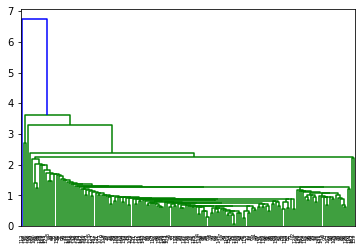

In [35]:
# single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [36]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
newData['all_cluster_id'] = cluster_labels
newData.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,all_cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0


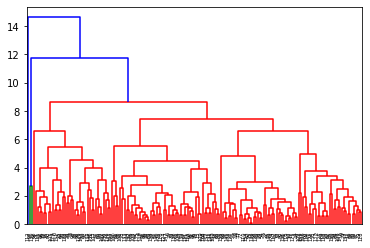

In [37]:
# single linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [38]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
newData['all_cluster_id'] = cluster_labels
newData.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,all_cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0


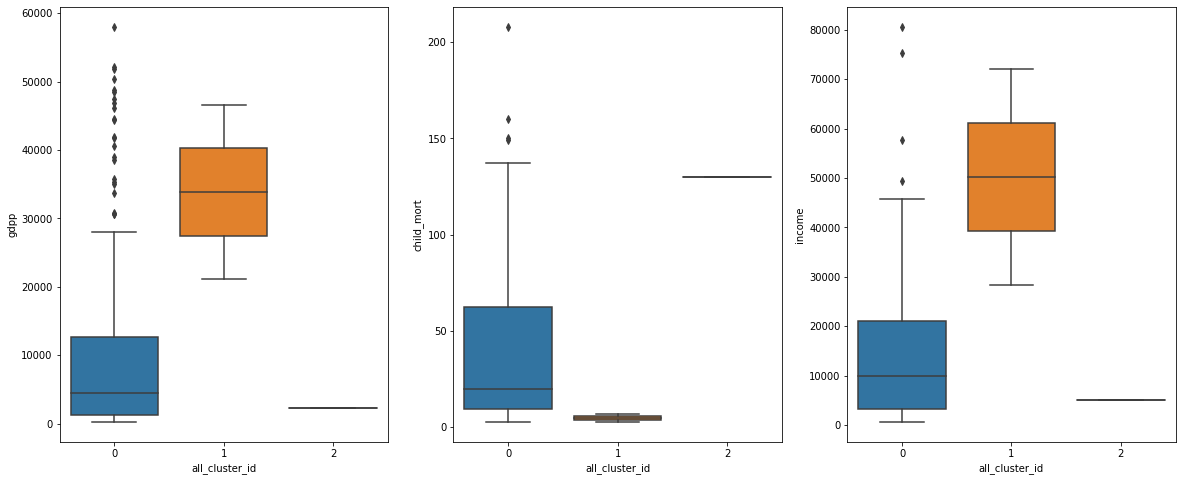

In [39]:
# plots
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.boxplot(x='all_cluster_id', y='gdpp', data=newData)

plt.subplot(1, 3, 2)
sns.boxplot(x='all_cluster_id', y='child_mort', data=newData)

plt.subplot(1, 3, 3)
sns.boxplot(x='all_cluster_id', y='income', data=newData)


# K - Means Clustering

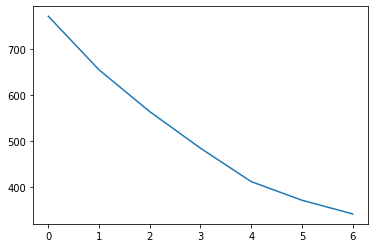

In [40]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [41]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

    

For n_clusters=2, the silhouette score is 0.3552707894562969
For n_clusters=3, the silhouette score is 0.23824310923679523
For n_clusters=4, the silhouette score is 0.23616240391598375
For n_clusters=5, the silhouette score is 0.2423574075984815
For n_clusters=6, the silhouette score is 0.2499147480395274
For n_clusters=7, the silhouette score is 0.24921713193168493
For n_clusters=8, the silhouette score is 0.23374847355347636


In [42]:
# model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
newData['cluster_id'] = kmeans.labels_

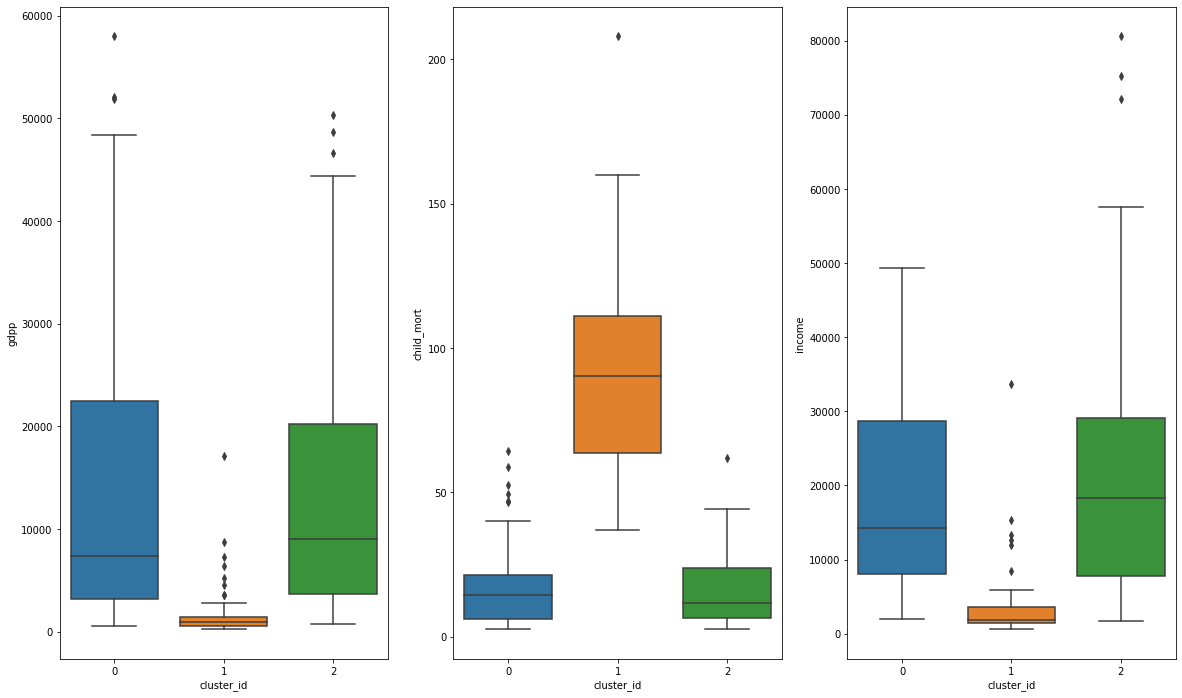

In [44]:
# plots
plt.figure(figsize=(20, 12))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id', y='gdpp', data=newData)

plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id', y='child_mort', data=newData)

plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id', y='income', data=newData)

In [45]:
# model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
newData['cluster_id'] = kmeans.labels_

In [47]:
newData.groupby('cluster_id')['gdpp'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_id,,,,,,,,
0,15.0,20550.666667,15497.831400,1310.0,9935.0,14600.0,28050.0,48700.0
1,47.0,1922.382979,2956.103925,231.0,550.0,897.0,1470.0,17100.0
2,61.0,6801.344262,7862.748355,592.0,2830.0,4140.0,7370.0,38500.0
3,40.0,25345.500000,17608.778107,1630.0,9940.0,22950.0,41825.0,58000.0


In [48]:
newData.groupby('cluster_id')['child_mort'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_id,,,,,,,,
0,15.0,8.826667,6.131239,2.8,4.5,6.8,10.9,23.3
1,47.0,92.961702,33.375229,36.9,63.8,90.2,111.0,208.0
2,61.0,24.736066,14.433838,3.6,14.9,20.3,33.3,64.4
3,40.0,9.027500,7.625059,2.6,4.1,5.8,11.4,40.0


In [49]:
newData.groupby('cluster_id')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_id,,,,,,,,
0,15.0,29086.000000,17983.105484,4490.0,20750.0,22700.0,34700.0,72100.0
1,47.0,3942.404255,5641.790360,609.0,1390.0,1870.0,3675.0,33700.0
2,61.0,14077.540984,15347.719446,1780.0,5840.0,9530.0,16000.0,80600.0
3,40.0,26208.750000,13083.072286,3340.0,15100.0,27950.0,37375.0,49400.0


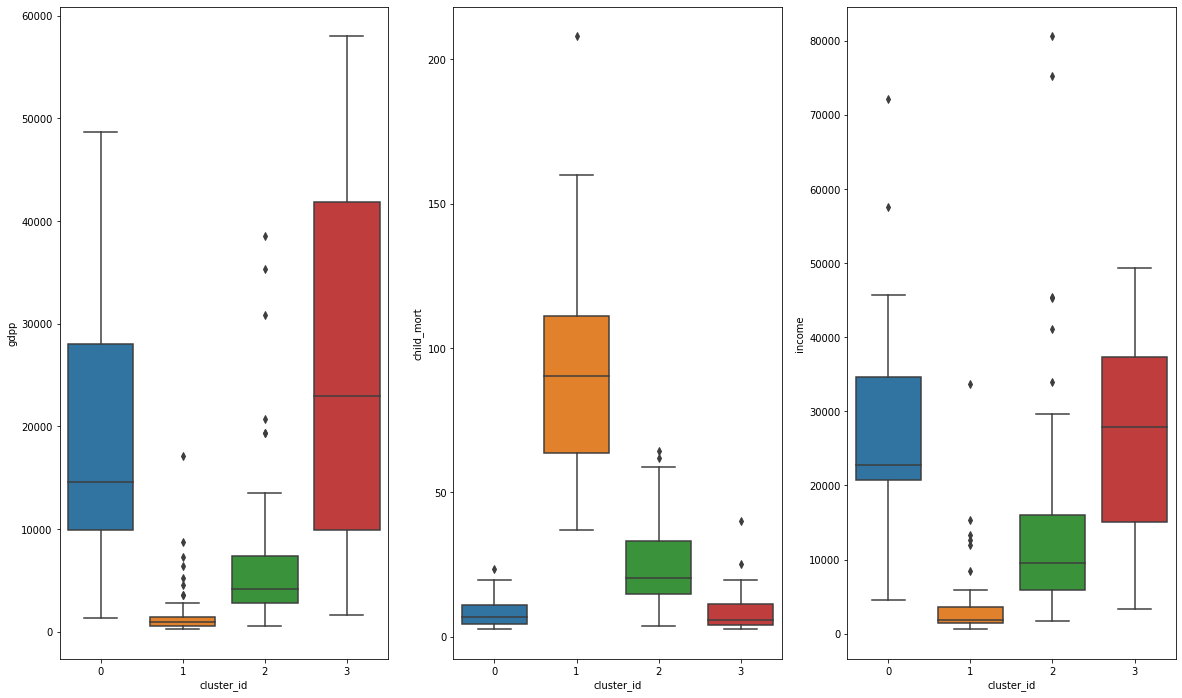

In [50]:
# plots
plt.figure(figsize=(20, 12))

plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id', y='gdpp', data=newData)

plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id', y='child_mort', data=newData)

plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id', y='income', data=newData)